# EDA AND PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import warnings
from tqdm import tqdm
warnings.filterwarnings( 'ignore' )

import matplotlib.pyplot as plt
import os 
import sys
import time
import seaborn as sns
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Task1'
file_list = os.listdir(path)
print(file_list)

['train_1st_Bearing.csv', 'train_1st_high.csv', 'train_1st_Looseness.csv', 'train_1st_Normal.csv', 'train_1st_Unbalance.csv', 'train_2nd_Bearing.csv', 'train_2nd_Looseness.csv', 'train_2nd_Unbalance.csv', 'train_3rd_Normal.csv', 'train_3rd_Unbalance.csv']


In [ ]:
def Dataset_Constructor(df, time_series_length = 128, NumofChannel = 2, label = None, window = 128):

  #Normal[label 0] → Fault-free operating condition
  #Unbalance[label 1] → Unbalance between centers of mass and axis
  #Belt-Looseness[label 2] → Looseness of V‐belt connecting between motor pully and screw pully
  #Belt-Looseness High[label 3] → High Looseness of V-belt
  #Bearing fault[label 4] → Removing grease of Ball Bearing on Motor, which induces its wear-out

  Number_of_data = int(df.shape[0]/(time_series_length -( 128 - window )))-128
  data_array = np.zeros((Number_of_data, time_series_length, NumofChannel))
  label = np.full_like(np.zeros((Number_of_data)), label)
  for i in tqdm(range(Number_of_data)):
    data_array[i]= df.iloc[window*(i) : window*i+128,: ].values
  ds = tf.data.Dataset.from_tensor_slices((data_array ,label))
  return ds

def TEST_Dataset_Constructor(df, time_series_length = 128, NumofChannel = 2, label = None, window = 128):
  Number_of_data = int(df.shape[0]/(time_series_length -( 128 - window )))
  data_array = np.zeros((Number_of_data, time_series_length, NumofChannel))
  label = np.full_like(np.zeros((Number_of_data)), label)
  for i in tqdm(range(Number_of_data)):
    data_array[i]= df.iloc[window*(i) : window*i+128,: ].values
  ds = tf.convert_to_tensor(data_array)
  return ds

### DATA Loading

In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/sample_submission_classification.csv')
final = pd.read_csv('/content/drive/MyDrive/final.csv').iloc[:,1:]
test_Dataset = TEST_Dataset_Constructor(final)

100%|██████████| 12592/12592 [00:00<00:00, 15229.64it/s]


In [ ]:
test_Dataset

<tf.Tensor: shape=(12592, 128, 2), dtype=float64, numpy=
array([[[ 6.62576243e-03, -1.00764169e+00],
        [ 3.39681656e-01, -1.19356350e+00],
        [ 1.55026444e-01, -3.02771980e-01],
        ...,
        [ 3.81732738e-01, -5.45504279e+00],
        [ 4.37805814e-01, -2.76629185e+00],
        [-1.68015868e-01,  1.26913680e+00]],

       [[-3.73458201e-01, -8.20410529e-02],
        [ 7.62308440e-01,  2.20492984e+00],
        [ 3.10487685e-02, -1.49788995e+00],
        ...,
        [ 4.75520658e-01, -1.09894112e+00],
        [-1.09677815e-01, -1.28995913e+00],
        [-3.45503620e-01, -1.01553931e+00]],

       [[ 4.07943884e-01,  2.46200470e+00],
        [-2.60822903e-02,  1.37903288e+00],
        [-7.95774654e-02, -3.63792047e+00],
        ...,
        [-1.09707617e-01,  1.57315033e+00],
        [ 2.42091347e-02, -2.63836536e+00],
        [-3.29618980e-01, -2.20459251e+00]],

       ...,

       [[ 1.63669119e-01, -2.49911399e+00],
        [-9.47915527e-02, -7.61951317e-01],
     

In [ ]:
print(len(sub), len(final))

12592 1611776


In [ ]:
train_1st_Bearing = pd.read_csv(os.path.join(path, file_list[0]),float_precision = 'round_trip').iloc[:, 1:]
train_1st_Looseness = pd.read_csv(os.path.join(path, file_list[1]),float_precision = 'round_trip').iloc[:, 1:]
train_1st_Normal = pd.read_csv(os.path.join(path, file_list[2]),float_precision = 'round_trip').iloc[:, 1:]
train_1st_Unbalance = pd.read_csv(os.path.join(path, file_list[3]),float_precision = 'round_trip').iloc[:, 1:]
train_1st_high = pd.read_csv(os.path.join(path, file_list[4]),float_precision = 'round_trip').iloc[:, 1:]
train_2nd_Bearing = pd.read_csv(os.path.join(path, file_list[5]),float_precision = 'round_trip').iloc[:, 1:]
train_2nd_Looseness = pd.read_csv(os.path.join(path, file_list[6]),float_precision = 'round_trip').iloc[:, 1:]
train_2nd_Unbalance = pd.read_csv(os.path.join(path, file_list[7]),float_precision = 'round_trip').iloc[:, 1:]
train_3rd_Normal = pd.read_csv(os.path.join(path, file_list[8]),float_precision = 'round_trip').iloc[:, 1:]
train_3rd_Unbalance = pd.read_csv(os.path.join(path, file_list[9]),float_precision = 'round_trip').iloc[:, 1:]

In [ ]:
train_1st_Bearing

,1st_Bearing_c1,1st_Bearing_c2
0,-0.261178,1.530771
1,1.070614,-3.171052
2,-1.402249,-0.213261
3,0.609899,3.161540
4,-0.299414,-1.550640
...,...,...
18979195,-1.870846,-1.168753
18979196,0.737394,3.602421
18979197,1.284579,-2.678137
18979198,-2.875021,-2.860482


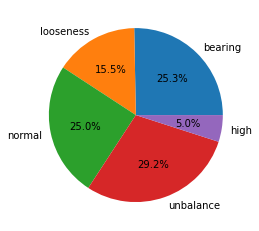

In [ ]:
bearing = train_1st_Bearing.shape[0]+train_2nd_Bearing.shape[0]
looseness = train_1st_Looseness.shape[0]+train_2nd_Looseness.shape[0]
normal = train_1st_Normal.shape[0] + train_3rd_Normal.shape[0]
unbalance = train_1st_Unbalance.shape[0] + train_2nd_Unbalance.shape[0] + train_3rd_Unbalance.shape[0]
high = train_1st_high.shape[0] 

plt.pie([bearing,looseness,normal,unbalance,high], labels=['bearing','looseness','normal','unbalance','high'], autopct='%.1f%%')
plt.show()

### Dataset Construction/Augmentation and Solving Class Imabalance Problem

In [ ]:
Bearing1st_ds = Dataset_Constructor(train_1st_Bearing, label = 4 )
Looseness1st_ds = Dataset_Constructor(train_1st_Looseness,label = 2,window = 90)
Normal1st_ds = Dataset_Constructor(train_1st_Normal, label = 0 )
Unbalance1st_ds = Dataset_Constructor(train_1st_Unbalance, label = 1)
High1st_ds = Dataset_Constructor(train_1st_high, label = 3, window = 9)

100%|██████████| 1308733/1308733 [01:21<00:00, 16030.27it/s]


In [ ]:
Bearing2nd_ds = Dataset_Constructor(train_2nd_Bearing, label = 4 )
Looseness2nd_ds = Dataset_Constructor(train_2nd_Looseness,label = 2,window = 90)
Unbalance2nd_ds = Dataset_Constructor(train_2nd_Unbalance, label = 1)
Normal3rd_ds = Dataset_Constructor(train_3rd_Normal, label = 0)
Unbalance3rd_ds = Dataset_Constructor(train_3rd_Unbalance, label = 1)

100%|██████████| 184375/184375 [00:11<00:00, 16728.65it/s]


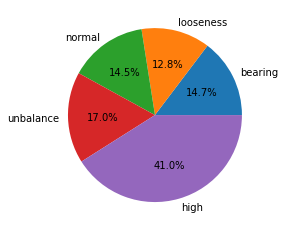

In [ ]:
bearing = Bearing1st_ds.__len__().numpy() + Bearing2nd_ds.__len__().numpy()
looseness = Looseness1st_ds.__len__().numpy() + Looseness2nd_ds.__len__().numpy()
normal = Normal1st_ds.__len__().numpy() + Normal3rd_ds.__len__().numpy()
unbalance = Unbalance1st_ds.__len__().numpy() + Unbalance2nd_ds.__len__().numpy() + Unbalance3rd_ds.__len__().numpy()
high = High1st_ds.__len__().numpy()

plt.pie([bearing,looseness,normal,unbalance,high], labels=['bearing','looseness','normal','unbalance','high'], autopct='%.1f%%')
plt.show()

In [ ]:
Dataset = Bearing1st_ds.concatenate(Looseness1st_ds).concatenate(Normal1st_ds).concatenate(Unbalance1st_ds).concatenate(High1st_ds).concatenate(Bearing2nd_ds).concatenate(Looseness2nd_ds).concatenate(Unbalance2nd_ds).concatenate(Normal3rd_ds).concatenate(Unbalance3rd_ds).shuffle(buffer_size = 4518720, seed = 42).batch(128).prefetch(1)
# batch 크기 조정 및 prefetch 조정

In [ ]:
Dataset

<PrefetchDataset shapes: ((None, 128, 2), (None,)), types: (tf.float64, tf.float64)>

In [ ]:
Dataset.__len__().numpy()


24922

In [ ]:
Valid_Dataset = Dataset.take(3000) 
Train_Dataset = Dataset.skip(3000)

In [ ]:
Valid_Dataset

<TakeDataset shapes: ((None, 128, 2), (None,)), types: (tf.float64, tf.float64)>

# VISUALIZATION

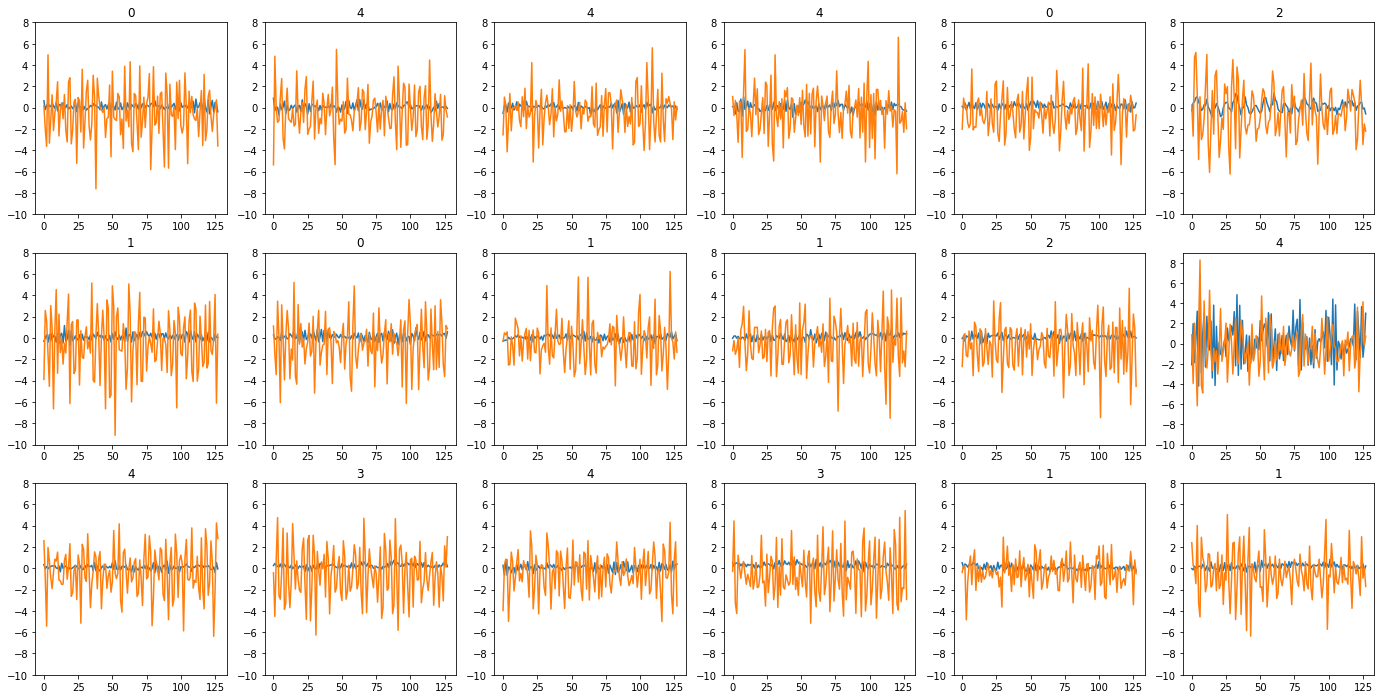

In [ ]:
rows = 3
cols = 6
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(24, 12))
for i, (audio, label) in enumerate(Dataset.unbatch().take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-10, 10, 2))
  label = int(label.numpy())#.decode('utf-8')
  ax.set_title(label)

#Fast Fourier Transform and Continuous Wavelet Transform

In [ ]:
Sample = list(Train_Dataset.unbatch().take(1).as_numpy_iterator())[0][0]

https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

In [ ]:
import  pywt
from scipy import fftpack

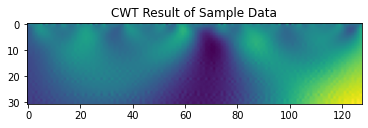

In [ ]:
coef, freqs = pywt.cwt(Sample ,np.arange(1,32), 'gaus1' , axis = 0)
plt.imshow(coef[:,:,0])
plt.title("CWT Result of Sample Data")
plt.show()

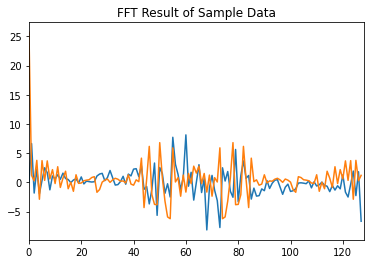

In [ ]:
imag = fftpack.fft(Sample[:,0]).imag
real = fftpack.fft(Sample[:,0]).real
plt.plot(imag)
plt.plot(real)
plt.xlim((0,128))
plt.title("FFT Result of Sample Data")
plt.show()

#CUSTOM MODELING

In [ ]:
CUSTOM_MODEL = keras.models.Sequential([
        keras.layers.InputLayer(input_shape=(128,2)),
        keras.layers.Conv1D(32, kernel_size=3, padding= 'same', activation = 'relu'),
        keras.layers.MaxPooling1D(2),
        keras.layers.Conv1D(16, kernel_size=3, padding = 'same', activation = 'relu'),
        keras.layers.MaxPooling1D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(units = 20, activation = 'relu'),
        keras.layers.Dropout(0.4), # overfitting 방지
        keras.layers.Dense(units = 5, activation = 'softmax')  # 클래스 수 5개
])

CUSTOM_MODEL.summary()

CUSTOM_MODEL.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # ANY CALLBACKS?

CUSTOM_MODEL.fit(Train_Dataset, epochs = 3, shuffle = True, validation_data = Valid_Dataset)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 128, 32)           224       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 64, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 64, 16)            1552      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 32, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                10260     
_________________________________________________________________
dropout (Dropout)            (None, 20)                0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ed6f6e590>]],
      dtype=object)

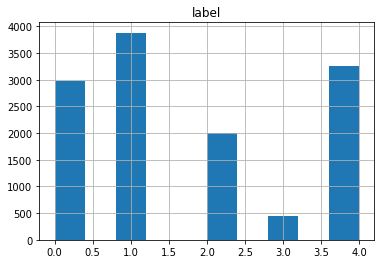

In [ ]:
pred = CUSTOM_MODEL.predict(test_Dataset)
a = np.argmax(pred,axis = 1)
sub.iloc[:,1] = a
sub.to_csv('/content/drive/MyDrive/CUSTOM_MODEL.csv', index = False)
sub.hist()